<a href="https://colab.research.google.com/github/luciekash/Feature-Engineering-with-Python-Project/blob/main/Feature_Engineering_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION ONE. DOCUMENTATION


**1.Specifying the Research Question.**

Sendy has hired you to help predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. Build a model that predicts an accurate delivery time, from picking up a package arriving at the final destination. An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers. You will be required to perform various feature engineering techniques while preparing your data for further analysis.

**2.Metrics of Success**

In accessing our model,we will use RMSE and the accuracy score to access our models. An RMSE score of 0.2 to 0.5 is good, this shows our models can relatively predict the target variable accurately. The lower the RMSE the better our model is.

**3.Context**

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

**4.Experimental Design**

You will be required to go through the following:

* Defining the Research Question

● Data Importation

● Data Exploration

● Data Cleaning

● Data Analysis (Univariate and Bivariate)

● Data Preparation

● Data Modeling

● Model Evaluation

● Challenging your Solution

● Recommendations / Conclusion

**5.Data Relevance**.

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders- from pick-up to drop-off. The dataset provided here is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. All data in this subset have been fully anonymized while preserving the distribution.

# SECTION TWO

In [22]:
#import libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

**Loading uploaded dataset and initial exploration.**

In [23]:
#loading our dataset and preview the head.
train = pd.read_csv('https://bit.ly/3deaKEM')
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [24]:
#preview the tail of the dataset
train.tail()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380
21200,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,...,3:17:23 PM,12,30.9,NaN,-1.255189,36.782203,-1.320157,36.830887,Rider_Id_177,2128


In [25]:
#loading our  variable definition dataset
vardef= pd.read_csv('https://bit.ly/30O3xsr')
vardef.head(29)

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [26]:
#check the shape of the train dataset
train.shape

(21201, 29)

**DATA CLEANING**

In [27]:
#checking for null values in the train dataset.
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [28]:
#we are going to drop precipitation in milimeters, it has very many missing values, more than 90%
train.drop(columns=['Precipitation in millimeters'],axis=1,inplace = True)

#in the temperature dataset, we decided to fill with the mode since the missing values are not as many
train['Temperature'] = train['Temperature'].fillna(train['Temperature'].mode()[0])


In [29]:
#confirming we do not have null values in the dataset

train.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

In [30]:
# checking for duplicates
train.duplicated().sum()

0

We have no duplicates in the train dataset

In [31]:
#checking the data type
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

We are going to change some data types.

In [32]:
#changing some columns to dtype
# train data
time_col = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
            'Arrival at Destination - Time ']

cat_col = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 
           'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Weekday (Mo = 1)',
           'Platform Type', 'Personal or Business', 'Vehicle Type']

numerical_columns  = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month',
                      'Pickup - Day of Month', 'Arrival at Destination - Day of Month', 'Distance (KM)', 
                      'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for column in cat_col:
  train[cat_col] = train[cat_col].astype('category')

for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
                    'Arrival at Destination - Time']:
    train.loc[:, time_column] = pd.to_datetime(train.loc[:, time_column]).dt.strftime('%H:%M:%S')

In [33]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in train.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(train[column].nunique())     #Printing the number of unique values in each column
  print(train[column].unique())      # Printing only unique values in each column
  print('\n')

Order No
21201
['Order_No_4211' 'Order_No_25375' 'Order_No_1899' ... 'Order_No_2831'
 'Order_No_6174' 'Order_No_9836']


User Id
3186
['User_Id_633' 'User_Id_2285' 'User_Id_265' ... 'User_Id_875'
 'User_Id_2001' 'User_Id_2524']


Vehicle Type
1
['Bike']
Categories (1, object): ['Bike']


Platform Type
4
[3, 1, 2, 4]
Categories (4, int64): [1, 2, 3, 4]


Personal or Business
2
['Business', 'Personal']
Categories (2, object): ['Business', 'Personal']


Placement - Day of Month
31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]


Placement - Weekday (Mo = 1)
7
[5, 2, 1, 3, 4, 6, 7]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]


Placement - Time
15686
['09:35:46' '11:16:16' '12:39:25' ... '16:48:16' '17:02:09' '17:06:16']


Confirmation - Day of Month
31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]


Confirmation - Weekday (Mo = 1)
7
[5, 2, 1, 3, 4, 6, 7]
Categories (7, int64): [1, 2, 3, 4, 5

Outliers

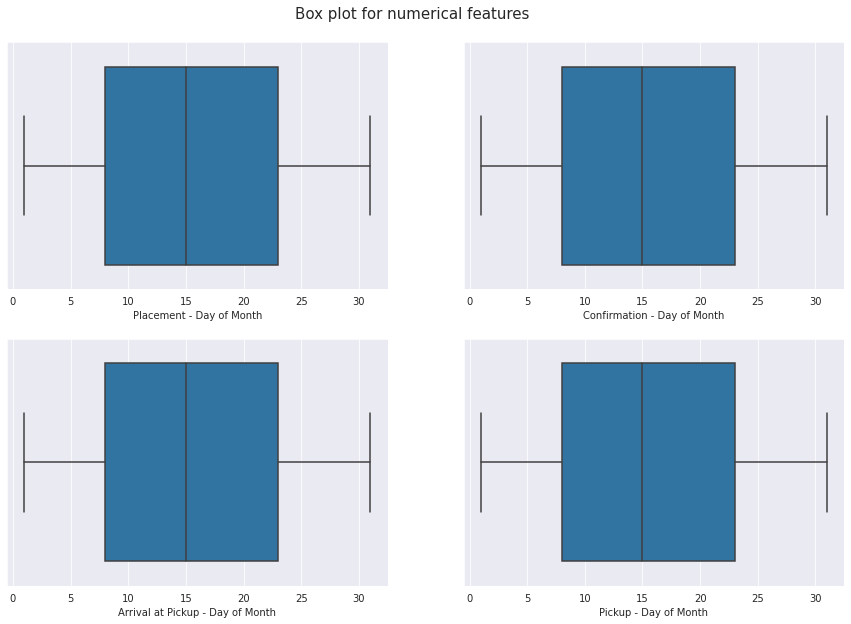

In [34]:
#outliers
#numerical_columns

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for numerical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, numerical_columns):
  sns.boxplot(train[name], ax = ax)

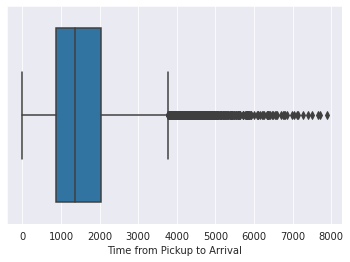

In [35]:
sns.boxplot(train['Time from Pickup to Arrival'])

Time from pick up to arrival varies depending on the pick up location to the destination. The distance radius of each destination varies hence the varying time

In [36]:
# dropping the columns in train
# train data
train.drop(['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)',
            'Arrival at Destination - Time'], axis=1, inplace=True)

In [37]:
#extract hour,min,sec from time columns

train[['place_h','place_m','place_s']] = train['Placement - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['confirm_h','confirm_m','confirm_s']] = train['Confirmation - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['arr_pickup_h','arr_pickup_m','arr_pickup_s']] = train['Arrival at Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['pickup_h','pickup_m','pickup_s']] = train['Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

In [38]:
#drop time columns

train.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis=1, inplace=True)

In [39]:
# dropping the minute and seconds columns

train.drop(['place_m', 'place_s', 'confirm_m', 'confirm_s', 'arr_pickup_m', 'arr_pickup_s', 'pickup_m', 'pickup_s'], axis=1, inplace=True)

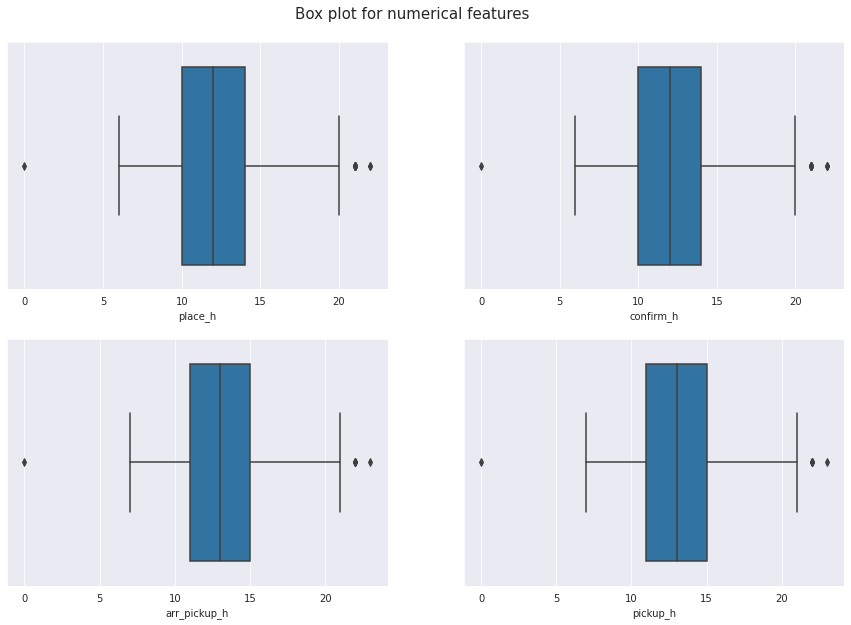

In [40]:
# checking for outliers in the time columns

time_columns = ['place_h', 'confirm_h', 'arr_pickup_h', 'pickup_h']

# boxplots
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for numerical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, time_columns):
  sns.boxplot(train[name], ax = ax)

In [41]:
# time in less than a minute ie < 60seconds

under_a_minute=train[train['Time from Pickup to Arrival'] < 60]
under_a_minute

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h
36,Order_No_9676,User_Id_393,Bike,3,Business,28,1,28,1,28,...,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_619,2,11,13,13,13
52,Order_No_27809,User_Id_3326,Bike,3,Business,13,4,13,4,13,...,-1.255189,36.782203,-1.256522,36.786413,Rider_Id_536,4,16,16,17,17
81,Order_No_4823,User_Id_2929,Bike,3,Business,11,2,11,2,11,...,-1.269534,36.806970,-1.255189,36.782203,Rider_Id_185,14,11,13,13,13
86,Order_No_23720,User_Id_391,Bike,3,Business,23,2,23,2,23,...,-1.283973,36.811515,-1.286745,36.825902,Rider_Id_613,4,13,13,13,13
126,Order_No_6027,User_Id_1469,Bike,3,Business,21,5,21,5,21,...,-1.257147,36.795063,-1.273165,36.790034,Rider_Id_793,16,12,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21065,Order_No_20998,User_Id_81,Bike,3,Business,21,4,21,4,21,...,-1.264150,36.791414,-1.261177,36.801916,Rider_Id_354,5,10,10,10,11
21085,Order_No_24557,User_Id_393,Bike,3,Business,25,1,25,1,25,...,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_25,5,11,11,11,11
21101,Order_No_21938,User_Id_2174,Bike,3,Business,27,1,27,1,27,...,-1.248278,36.884092,-1.261795,36.822333,Rider_Id_86,4,13,13,13,14
21105,Order_No_27247,User_Id_302,Bike,3,Business,16,6,16,6,16,...,-1.264960,36.798178,-1.311233,36.814632,Rider_Id_314,27,19,19,19,20


In [42]:
# drop details with time in less than 60seconds 

train.drop(train[train['Time from Pickup to Arrival'] < 60].index, inplace = True) 

#  Data Analysis (Univariate and Bivariate)

Univariate Analysis

Measure of Central Tendencies

In [43]:
# using a for loop to find the median value of all the numerical columns
numerical_columns  = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month',
                      'Pickup - Day of Month', 'Distance (KM)', 
                      'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for column in numerical_columns:
  print('\n')
  print(column +':' + str(train[column].median()))
  print(column +':' + str(train[column].mode()))
  print(column +':' + str(train[column].mean()))



Placement - Day of Month:15.0
Placement - Day of Month:0    8
dtype: int64
Placement - Day of Month:15.642832706123846


Confirmation - Day of Month:15.0
Confirmation - Day of Month:0    8
dtype: int64
Confirmation - Day of Month:15.64297932652363


Arrival at Pickup - Day of Month:15.0
Arrival at Pickup - Day of Month:0    8
dtype: int64
Arrival at Pickup - Day of Month:15.64297932652363


Pickup - Day of Month:15.0
Pickup - Day of Month:0    8
dtype: int64
Pickup - Day of Month:15.64297932652363


Distance (KM):8.0
Distance (KM):0    8
dtype: int64
Distance (KM):9.618249352426568


Temperature:24.7
Temperature:0    24.7
dtype: float64
Temperature:23.51854259322785


Pickup Lat:-1.279395
Pickup Lat:0   -1.255189
dtype: float64
Pickup Lat:-1.281278987752305


Pickup Long:36.806749
Pickup Long:0    36.782203
dtype: float64
Pickup Long:36.811149913669254


Destination Lat:-1.2845748
Destination Lat:0   -1.255189
dtype: float64
Destination Lat:-1.2826258403743818


Destination Long:36.8

The months and distance all have the same mode at 8. Temperature's mode is at 24.7. The latitudes have a negative mode.

The busiest day of the month is on 8th and the most popular distance travelled is 8KM. Temperatures are mostly at 24.7

Bivariate Analysis.

In [44]:
#check our columns.
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'place_h', 'confirm_h',
       'arr_pickup_h', 'pickup_h'],
      dtype='object')

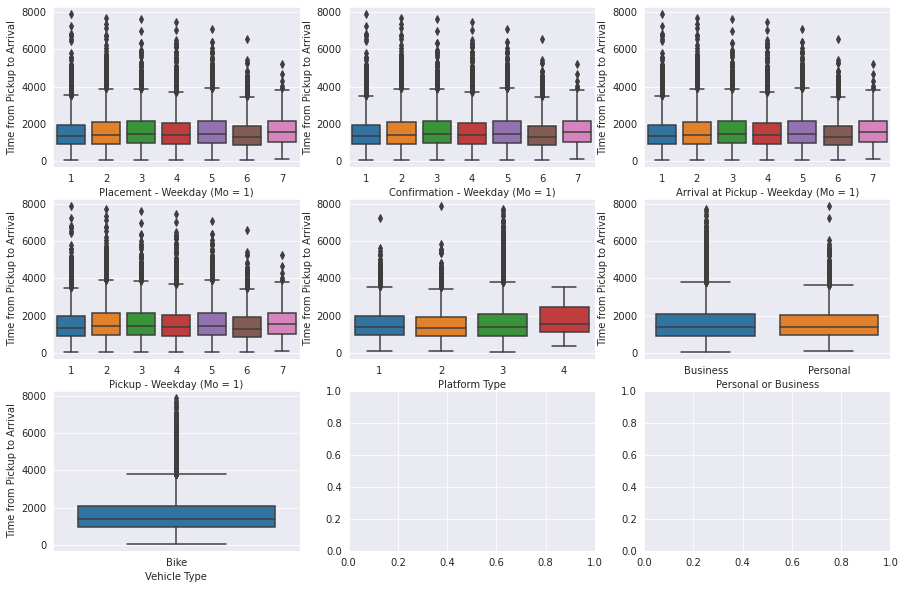

In [45]:
#Plotting our categorical column against the target variable

cat_col = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 
           'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 
           'Platform Type', 'Personal or Business', 'Vehicle Type']
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(cat_col, ax.flatten()):
    sns.boxplot(x=var, y='Time from Pickup to Arrival', data=train, ax=subplot)

The boxplots show how categorical variables are related to the target variable.On placement on weekday, deliveries on day 5 took more time as compared to day 6 and this is also true for confirmation of the orders and arrival at pickup.

Platform 4 had less placement of orders and it took more time to deliver the orders at approximately 2300 seconds.

Business deliveries took more time compared to personal deliveries.

In [46]:
# time from pickup to arrival

train['Time from Pickup to Arrival'].max()
train['Time from Pickup to Arrival'].min()

print('The maximum time taken is ', train['Time from Pickup to Arrival'].max())
print('The minimum time taken is ', train['Time from Pickup to Arrival'].min())

The maximum time taken is  7883
The minimum time taken is  62


In [47]:
# temperature

train['Temperature'].max()
train['Temperature'].min()

print('The maximum temperature is ', train['Temperature'].max())
print('The minimum temperature is ', train['Temperature'].min())

The maximum temperature is  32.1
The minimum temperature is  11.2


<Figure size 1296x1296 with 0 Axes>

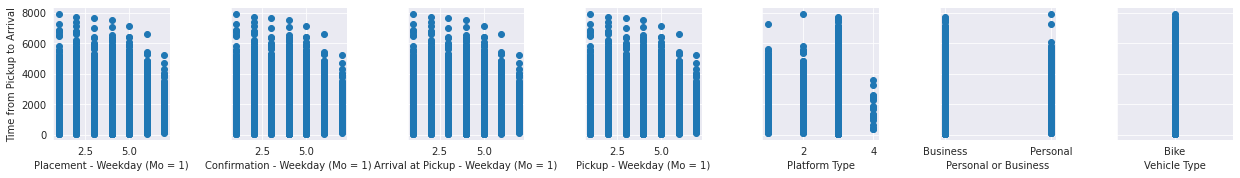

In [48]:
# time vs numerical columns
plt.figure(figsize=(18, 18))
g = sns.PairGrid(train, x_vars=cat_col, y_vars=['Time from Pickup to Arrival'])
g.map(plt.scatter)

The categorical do not have a correlation to the time a rider took

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab277b810>,
      dtype=object)

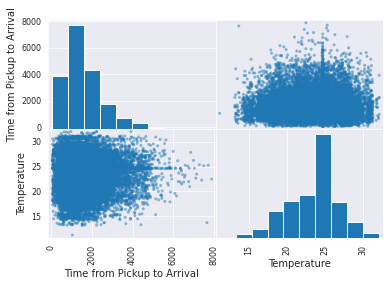

In [49]:
# time vs temperature

pd.plotting.scatter_matrix(train.loc[:, ['Time from Pickup to Arrival', 'Temperature']])

Temperature did not affect the time a rider took as there is no negative or positive correlation as shown in the above scatter plots

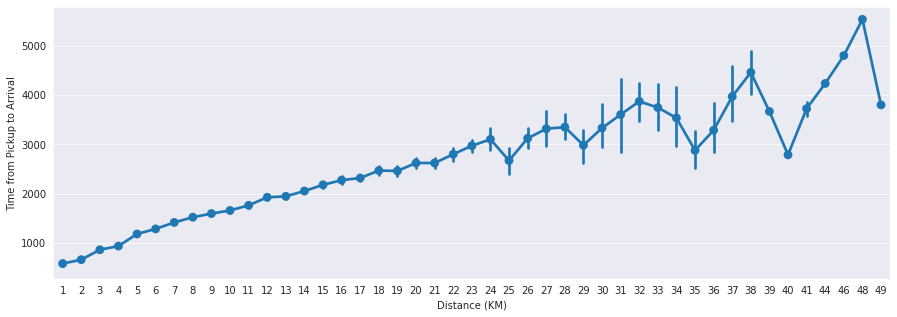

In [50]:
# time vs distance
f, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=train)

The maximum distance travelled is 49km at around 6000 seconds

Multivariate Analysis

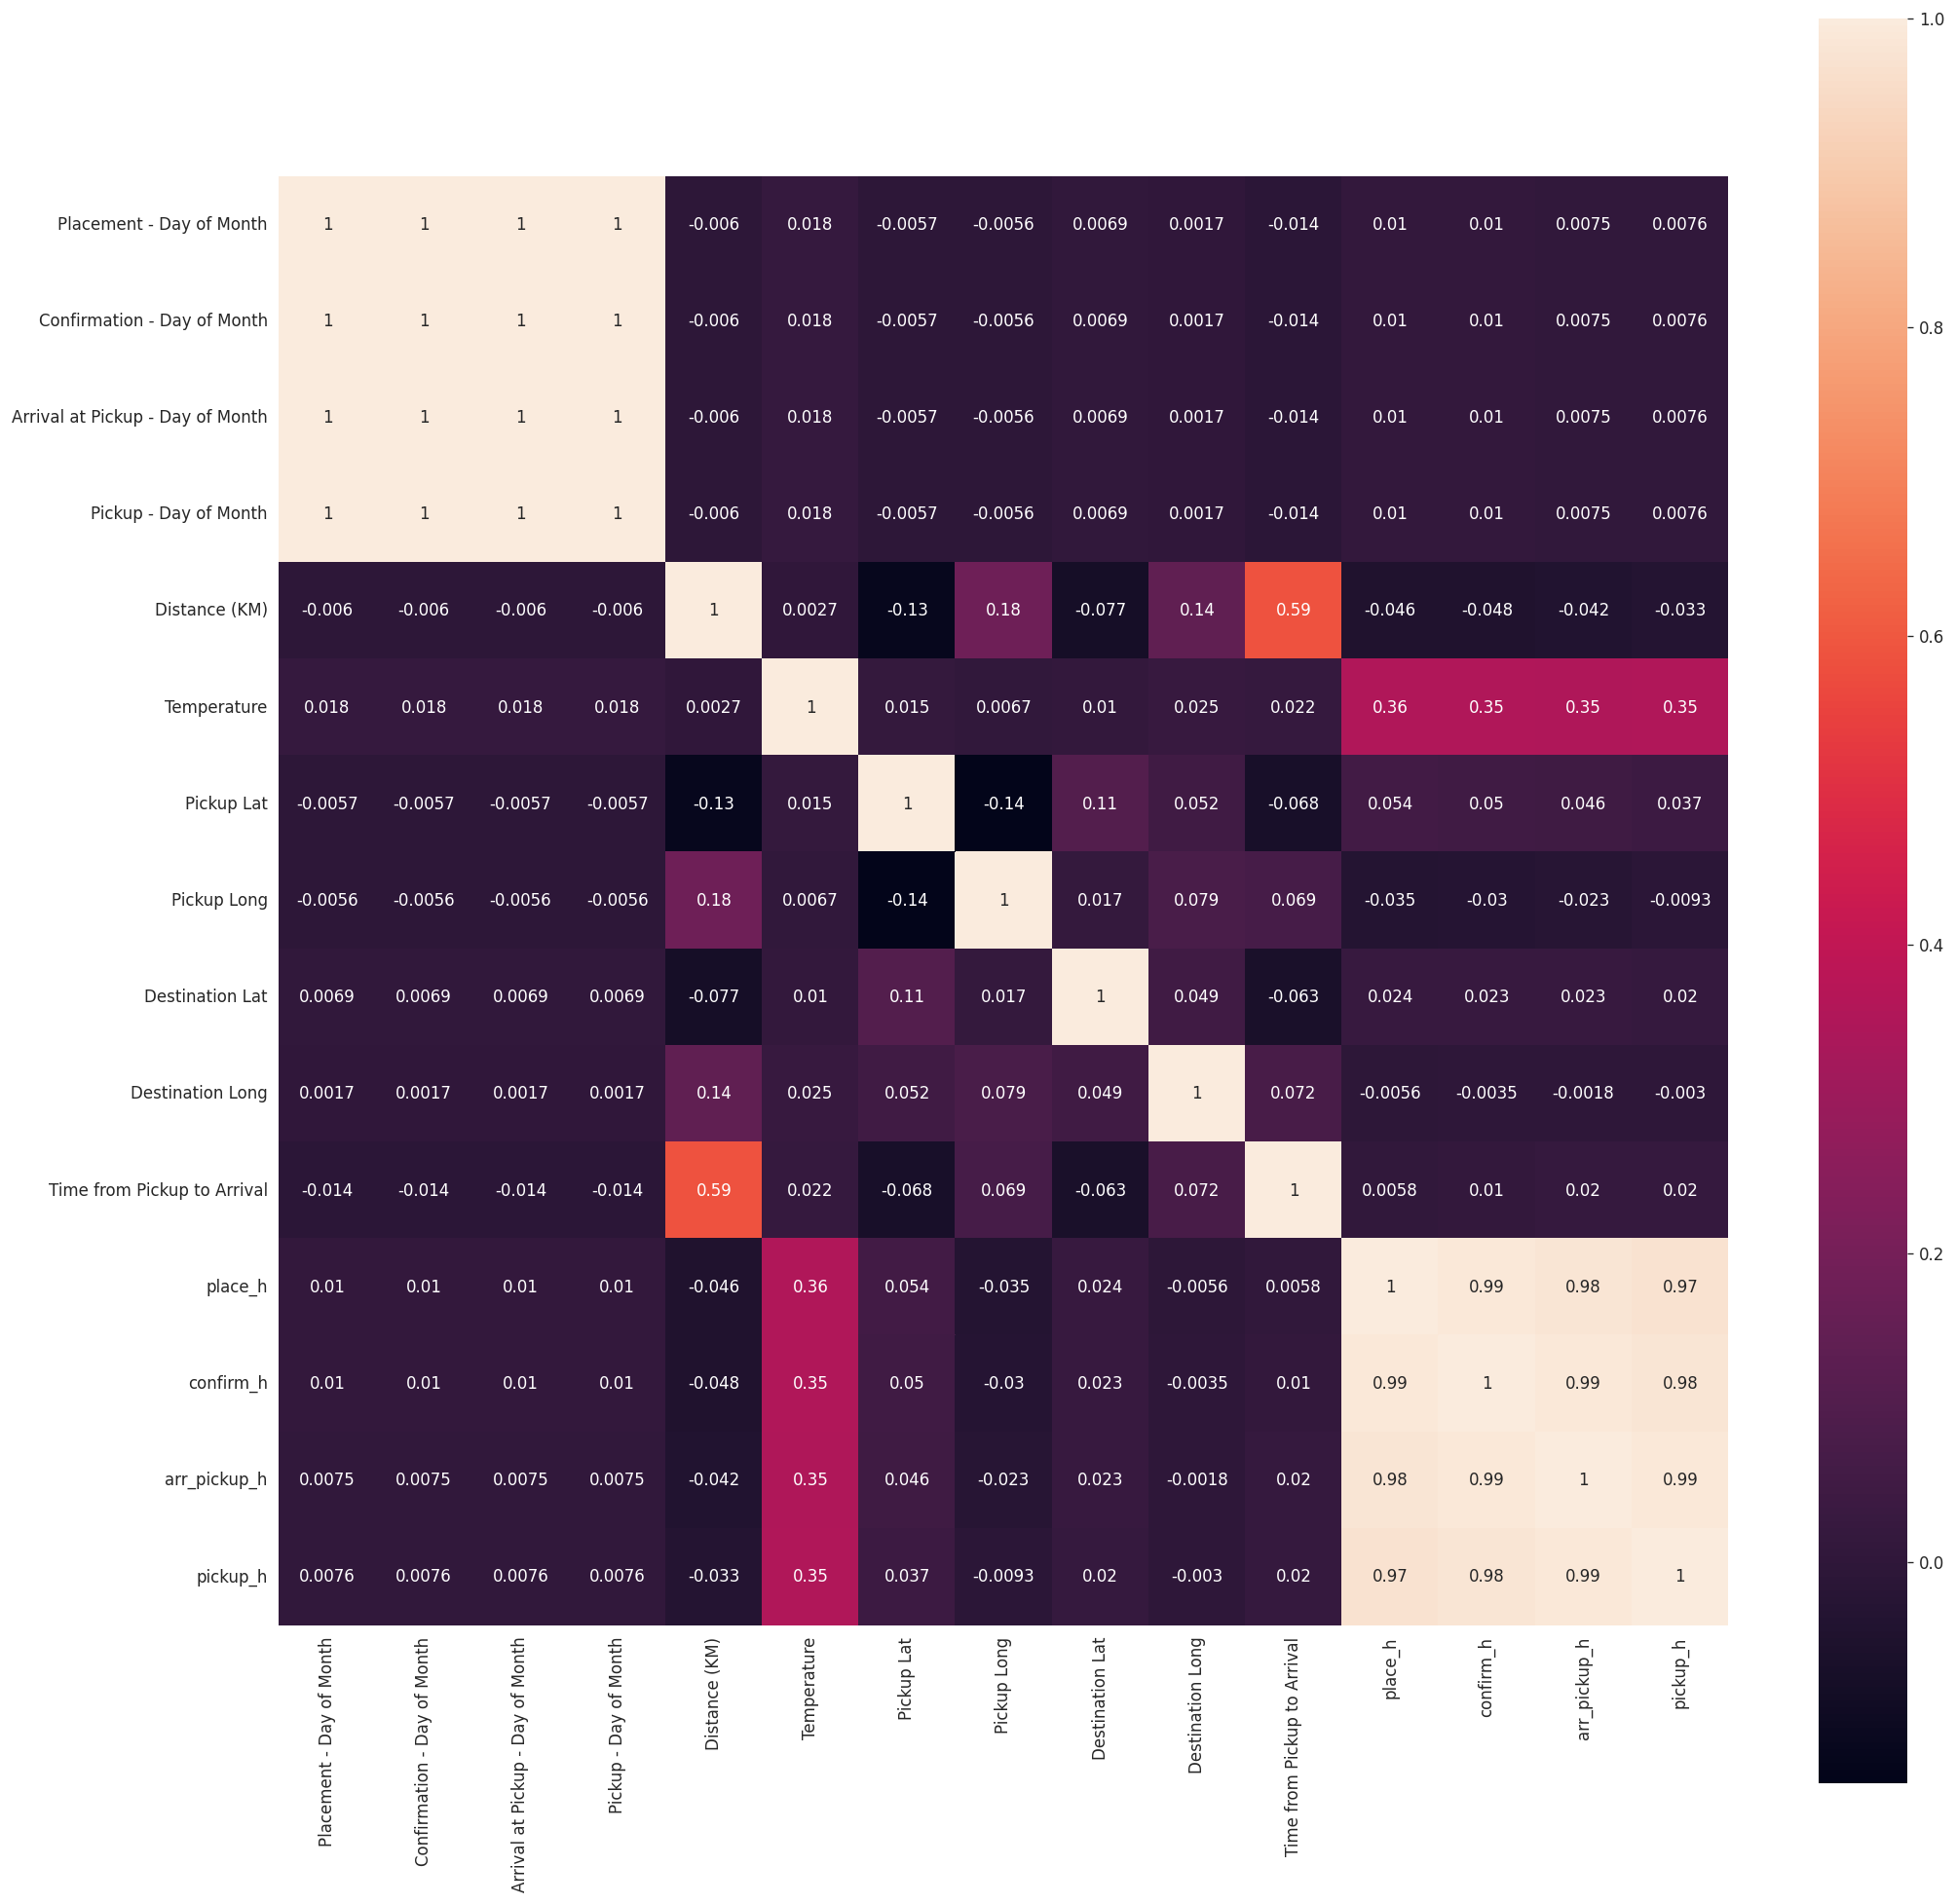

In [51]:
#check the correlation of the variables.
# Correlation 
plt.figure(dpi = 120,figsize= (20,20))
corr =train.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [52]:
# drop high coreelated values
col_drop = ['Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']
for y in col_drop:
  train.drop(y, axis=1, inplace=True)

dropped highly correlated variables

                             Placement - Day of Month  Distance (KM)  \
Placement - Day of Month                     1.000000      -0.006011   
Distance (KM)                               -0.006011       1.000000   
Temperature                                  0.018243       0.002672   
Pickup Lat                                  -0.005690      -0.125116   
Pickup Long                                 -0.005568       0.182053   
Destination Lat                              0.006920      -0.077321   
Destination Long                             0.001660       0.139312   
Time from Pickup to Arrival                 -0.013621       0.585882   
place_h                                      0.010247      -0.045995   
confirm_h                                    0.010168      -0.047791   
arr_pickup_h                                 0.007486      -0.041894   
pickup_h                                     0.007634      -0.033185   

                             Temperature  Pickup Lat  Pickup Lo

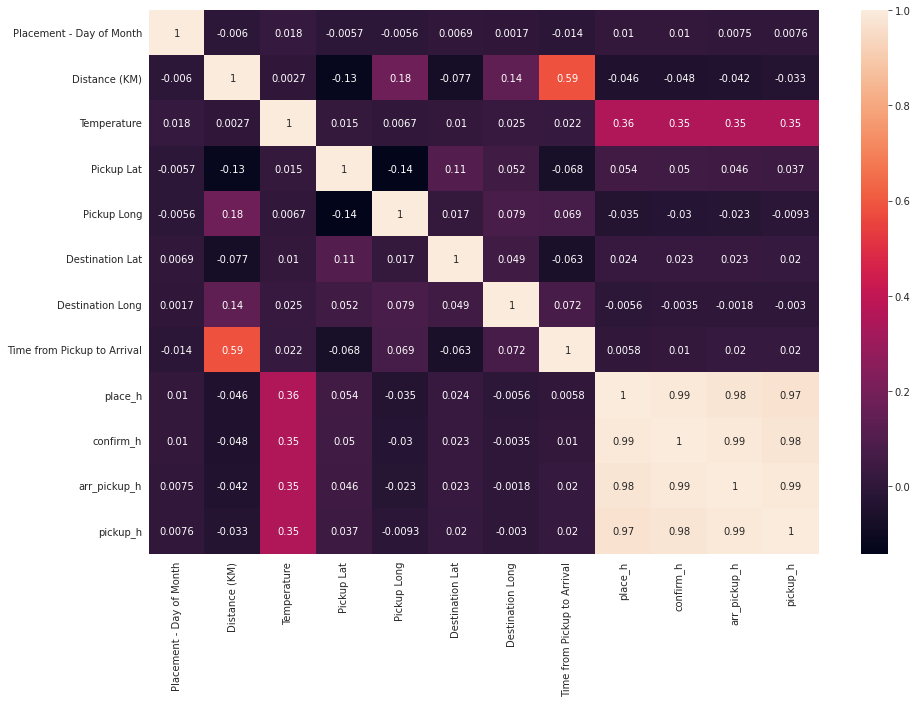

In [53]:
# Let's display the correlations between the variables
correlations = train.corr()
print(correlations)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, ax=ax);

Reduction Techniques

LDA technique can be utilized for extracting information from a high-dimensional(features) space by projecting it into a lower-dimensional sub-space.

it tries to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [54]:
# separating target variable from other features

factors = train.drop(['Time from Pickup to Arrival'], axis=1)
train_labels = train['Time from Pickup to Arrival']

In [55]:
#encoding categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Personal or Business'] = le.fit_transform(train['Personal or Business'])
train['Vehicle Type'] = le.fit_transform(train['Vehicle Type'])
train['Rider Id'] = le.fit_transform(train['Rider Id'])
train.drop(['Order No', 'User Id'], axis=1, inplace=True)

In [56]:
# separating target variable from other features

factors = train.drop(['Time from Pickup to Arrival'], axis=1)
train_labels = train['Time from Pickup to Arrival']

In [57]:
#Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(factors, train_labels)
lda_factors = lda_.transform(factors)

# Display the coeficients of the reducted columns
lda_.coef_

array([[ 0.        , -0.28327106, -0.44341824, ...,  0.42782326,
        -0.17135573, -1.31515025],
       [ 0.        ,  0.26994911, -1.14093952, ..., -2.3219107 ,
         2.34158985, -0.76270277],
       [ 0.        ,  0.17232893, -0.99035245, ..., -0.22925747,
        -3.93100146,  3.2245561 ],
       ...,
       [ 0.        ,  0.96421672, -1.37125623, ...,  0.76334413,
         0.31424701, -1.84099821],
       [ 0.        , -0.28364694, -1.32559466, ...,  0.42215289,
        -0.42000516, -1.50260192],
       [ 0.        ,  0.78630966,  6.62110633, ...,  1.45318157,
         0.54133115, -2.03305868]])

In [58]:
#create a dataframe to extract the name of columns

factors = pd.DataFrame(index=factors.columns.values, data=lda_.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format 
factors.sort_values(0, ascending=False)

,0
Pickup Lat,26.54069332
Destination Long,4.67658839
place_h,1.16260284
Temperature,0.52496559
confirm_h,0.42782326
Placement - Weekday (Mo = 1),0.42386318
Placement - Day of Month,0.13089425
Vehicle Type,0.00000000
Rider Id,-0.00369708
Distance (KM),-0.05755072


Destination longitude, placement-weekday, arr at pickup, avgspeed and placement hour are the top 5 factors that affect the target variable

In [59]:
# calculating the speed of a rider
# using distance in km and time in seconds
# calculating the speed of a rider
# using distance in km and time in seconds

train.loc[:, 'avgspeed'] = train['Distance (KM)'] / (train['Time from Pickup to Arrival'] / 3600)
train.head(2)

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Weekday (Mo = 1),Arrival at Pickup - Weekday (Mo = 1),Pickup - Weekday (Mo = 1),Distance (KM),Temperature,...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed
0,0,3,0,9,5,5,5,5,4,20.40000000,...,36.83037030,-1.30040620,36.82974100,361,745,9,9,10,10,19.32885906
1,0,3,1,12,5,5,5,5,16,26.40000000,...,36.89931500,-1.29500410,36.81435830,811,1993,11,11,11,11,28.90115404


Multicollinearity.

In [60]:
correlations = train.corr()
correlations

,Vehicle Type,Personal or Business,Placement - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal or Business,NaN,1.00000000,-0.01180547,-0.01432062,-0.21788961,-0.02579966,-0.03571236,-0.00622232,-0.06478026,0.00546297,-0.01034540,0.02424393,0.01999134,0.02556092,0.02001480,-0.03486298
Placement - Day of Month,NaN,-0.01180547,1.00000000,-0.00601093,0.01824272,-0.00568997,-0.00556826,0.00691959,0.00166043,-0.00803906,-0.01362138,0.01024672,0.01016804,0.00748649,0.00763418,0.00642763
Distance (KM),NaN,-0.01432062,-0.00601093,1.00000000,0.00267247,-0.12511630,0.18205263,-0.07732114,0.13931208,0.01690765,0.58588182,-0.04599520,-0.04779119,-0.04189445,-0.03318467,0.19002953
Temperature,NaN,-0.21788961,0.01824272,0.00267247,1.00000000,0.01513934,0.00668781,0.01019047,0.02525606,0.01484189,0.02164965,0.35593893,0.35391113,0.35139951,0.35340650,0.00537864
Pickup Lat,NaN,-0.02579966,-0.00568997,-0.12511630,0.01513934,1.00000000,-0.14318184,0.10686205,0.05167781,0.00737954,-0.06767701,0.05367044,0.04993579,0.04585650,0.03687634,-0.03040596
Pickup Long,NaN,-0.03571236,-0.00556826,0.18205263,0.00668781,-0.14318184,1.00000000,0.01701814,0.07890203,0.02374748,0.06886032,-0.03522369,-0.02955627,-0.02291886,-0.00927962,0.07022957
Destination Lat,NaN,-0.00622232,0.00691959,-0.07732114,0.01019047,0.10686205,0.01701814,1.00000000,0.04932642,-0.00005180,-0.06333392,0.02392126,0.02302985,0.02264388,0.02045938,-0.01026307
Destination Long,NaN,-0.06478026,0.00166043,0.13931208,0.02525606,0.05167781,0.07890203,0.04932642,1.00000000,0.02125414,0.07235661,-0.00556258,-0.00345422,-0.00176096,-0.00295065,0.02515747
Rider Id,NaN,0.00546297,-0.00803906,0.01690765,0.01484189,0.00737954,0.02374748,-0.00005180,0.02125414,1.00000000,0.00706700,-0.00638344,-0.00363153,-0.00518059,-0.00463950,-0.00043984


VIF scores

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable

In [61]:
#Creating VIF table
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

vif_df

,Vehicle Type,Personal or Business,Placement - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal or Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placement - Day of Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance (KM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rider Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#creating new feature, speed
train['speed']=train['Distance (KM)']/train['Time from Pickup to Arrival']

In [65]:
train.head()

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Weekday (Mo = 1),Arrival at Pickup - Weekday (Mo = 1),Pickup - Weekday (Mo = 1),Distance (KM),Temperature,...,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed,speed
0,0,3,0,9,5,5,5,5,4,20.40000000,...,-1.30040620,36.82974100,361,745,9,9,10,10,19.32885906,0.00536913
1,0,3,1,12,5,5,5,5,16,26.40000000,...,-1.29500410,36.81435830,811,1993,11,11,11,11,28.90115404,0.00802810
2,0,3,0,30,2,2,2,2,3,24.70000000,...,-1.30092100,36.82819500,61,455,12,12,12,12,23.73626374,0.00659341
3,0,3,0,15,5,5,5,5,9,19.20000000,...,-1.25714720,36.79506330,810,1341,9,9,9,9,24.16107383,0.00671141
4,0,1,1,13,1,1,1,1,9,15.40000000,...,-1.29504080,36.80981720,719,1214,9,9,10,10,26.68863262,0.00741351


In [66]:
# getting target  from the dataframe
y = train["Time from Pickup to Arrival"]
 
# getting features from the dataframe
X = train.drop(columns=["Time from Pickup to Arrival"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
 

In [67]:
# scaling our features
from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

In [68]:
#use PCA in feature transformation
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [70]:
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [71]:
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(np.sqrt(mean_squared_error(y_test, pred_final)))

[13:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
283.12388955604314
